# ML/ Image Quality Detector
> part 3
## LET's teach  a Convolutional Neuron To "learn" an image "feature"

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import torch,torch.nn as nn, torch.optim as optim

In [2]:
# Let's create a image maually
img_1 = np.array([
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

img_2 = np.array([
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])
img_3 = np.array([
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

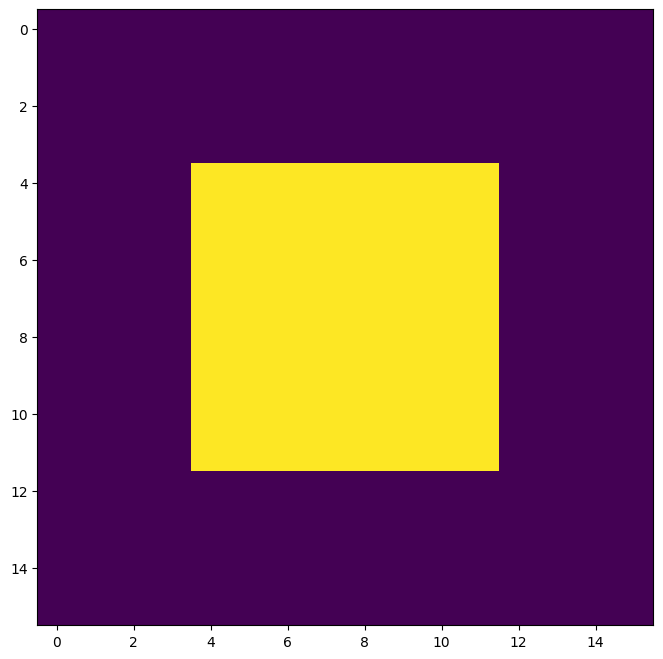

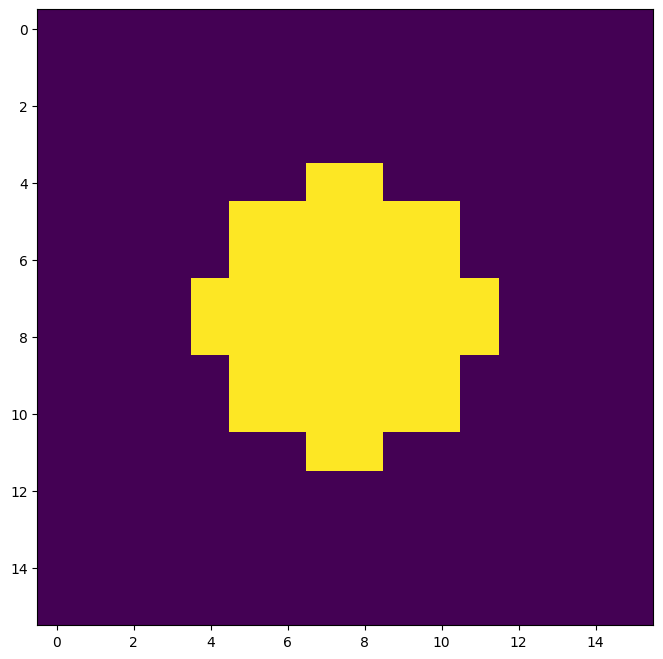

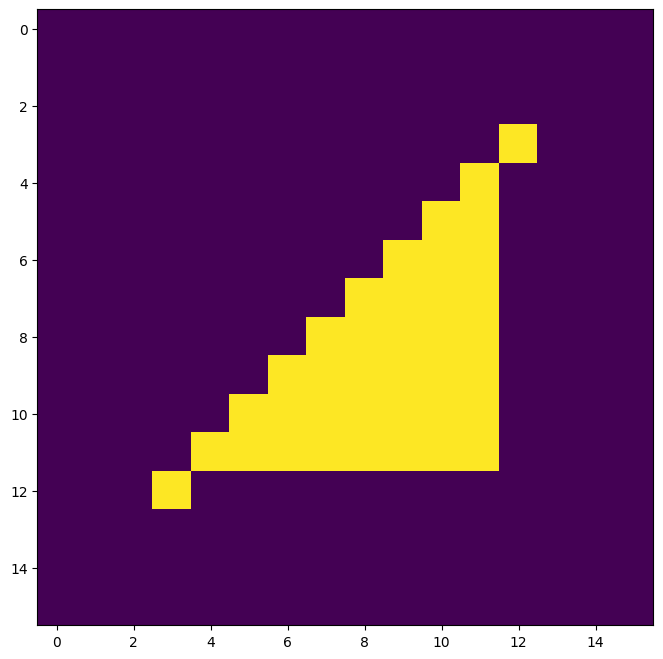

In [3]:
# Plot it
plt.figure(figsize=(8,8))
plt.imshow(img_1)

plt.figure(figsize=(8,8))
plt.imshow(img_2)

plt.figure(figsize=(8,8))
plt.imshow(img_3)


## Let's teach the CNN to distinguish betwin square and circle

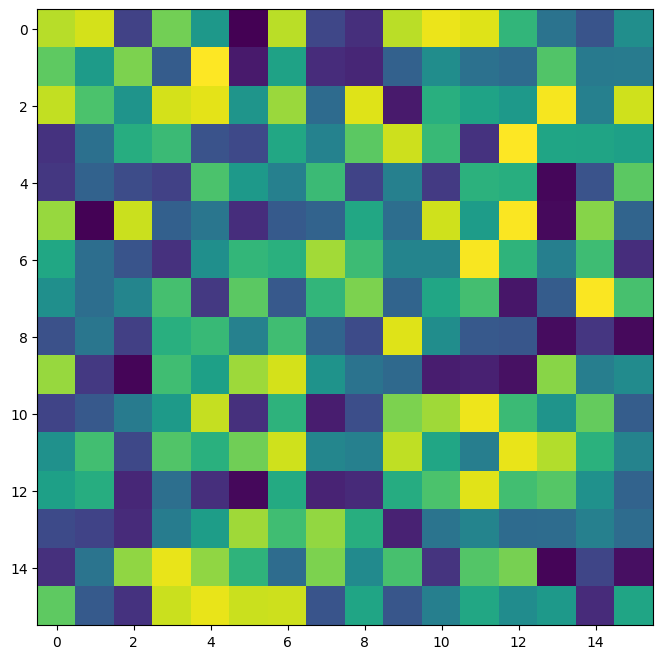

In [4]:
# SQUARE - 0 
# CORCLE - 1

# img of a square -> X CNN ---> Y -> 0
# img of circlel  -> X CNN ---> Y -> 1

cn = nn.Conv2d(in_channels= 1, out_channels=1, kernel_size=(16,16))
plt.figure(figsize=(8,8))
plt.imshow(cn.weight.detach().numpy()[0][0])

## Let's pass the image trough the neuron without traning

In [5]:
X = [
    torch.from_numpy(img_1).type(torch.FloatTensor).view(1,16,16),# square
    # torch.from_numpy(img_2).type(torch.FloatTensor).view(1,16,16),# circle
    torch.from_numpy(img_3).type(torch.FloatTensor).view(1,16,16),# triangle
]
Y = [
    # torch.FloatTensor([[[-1]]]),
    torch.FloatTensor([[[0]]]),
    torch.FloatTensor([[[1]]]),
]
Yp = [None,None,None]
Yp[0] = cn(X[0])
Yp[1] = cn(X[1])
# Yp[2] = cn(X[2])

print(Yp)


[tensor([[[0.4706]]], grad_fn=<SqueezeBackward1>), tensor([[[0.4007]]], grad_fn=<SqueezeBackward1>), None]


In [6]:
criterion = nn.BCEWithLogitsLoss()
optimizer =  optim.SGD(cn.parameters(), lr = 0.00005)

for epoch in range(50000):

    for i in range(len(X)):

        optimizer.zero_grad()

        yp = cn(X[i])

        loss = criterion(yp, Y[i])

        loss.backward()
        optimizer.step()

    if epoch % 1000 == 0:
        print(f"epoch{epoch:6d} loss ={loss}")

            

epoch     0 loss =0.5132066607475281
epoch  1000 loss =0.5539523363113403
epoch  2000 loss =0.49702638387680054
epoch  3000 loss =0.42766064405441284
epoch  4000 loss =0.3674136698246002
epoch  5000 loss =0.31865832209587097
epoch  6000 loss =0.27961465716362
epoch  7000 loss =0.24812017381191254
epoch  8000 loss =0.2223985493183136
epoch  9000 loss =0.20111145079135895
epoch 10000 loss =0.1832696497440338
epoch 11000 loss =0.1681407243013382
epoch 12000 loss =0.15517671406269073
epoch 13000 loss =0.14396211504936218
epoch 14000 loss =0.13417814671993256
epoch 15000 loss =0.12557652592658997
epoch 16000 loss =0.11796199530363083
epoch 17000 loss =0.11117880046367645
epoch 18000 loss =0.10510174930095673
epoch 19000 loss =0.09962913393974304
epoch 20000 loss =0.09467710554599762
epoch 21000 loss =0.09017668664455414
epoch 22000 loss =0.08607010543346405
epoch 23000 loss =0.08230918645858765
epoch 24000 loss =0.07885283976793289
epoch 25000 loss =0.0756661593914032
epoch 26000 loss =0.07

In [ ]:
# Test treined neuron
Yp[0] = cn(X[0])
Yp[1] = cn(X[1])
print(Yp)

[tensor([[[-3.5665]]], grad_fn=<SqueezeBackward1>), tensor([[[3.2608]]], grad_fn=<SqueezeBackward1>), None]


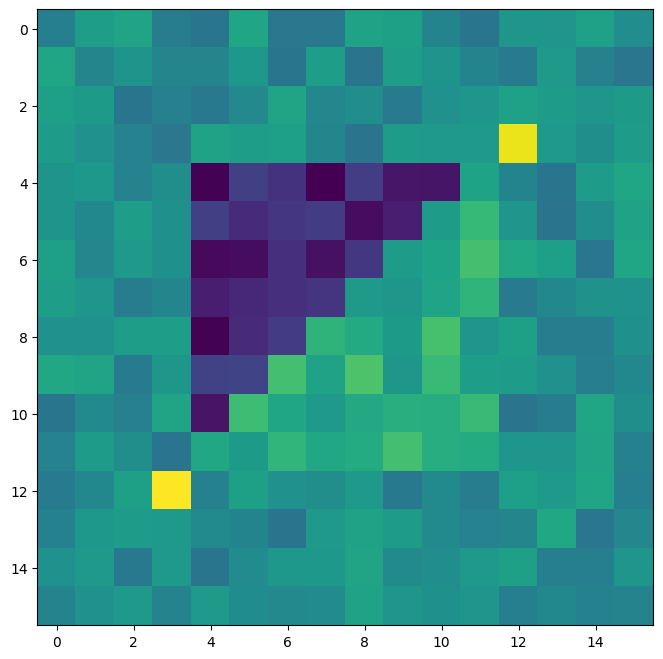

In [ ]:
# Check neuron wheigt
plt.figure(figsize=(8,8))
plt.imshow(cn.weight.detach().numpy()[0][0])